In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
from sklearn.metrics import r2_score

In [44]:
# Given data
x_data = np.array([811, 892, 911, 917, 922, 926, 931, 936, 939, 945, 949, 954, 959, 969, 978, 986, 996, 1010, 1017, 1023, 1023])
y_data = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])

In [45]:
# Fit a quadratic function
coefficients0 = np.polyfit(x_data, y_data, 1)
eq0 = np.poly1d(coefficients0)
coefficients1 = np.polyfit(x_data, y_data, 2)
eq1 = np.poly1d(coefficients1)
coefficients2 = np.polyfit(x_data, y_data, 3)
eq2 = np.poly1d(coefficients2)

# Generate x values for the plot
x_fit = np.linspace(min(x_data), max(x_data), 100)

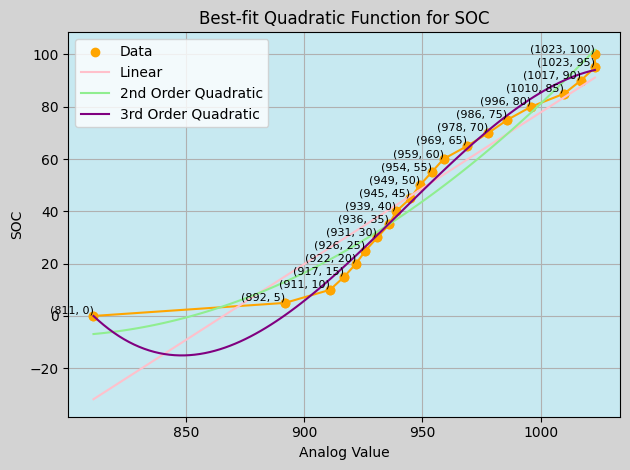

In [46]:
# Set the background color of the figure
fig = plt.figure(facecolor='lightgrey')
# Plot the data and the best-fit quadratic function
ax = fig.add_subplot(111)
ax.set_facecolor('#c7e9f1')

# Plot the data and the best-fit quadratic function
plt.scatter(x_data, y_data, label='Data', color='orange')
plt.plot(x_data, y_data, color='orange', linestyle='-', marker='o')
plt.plot(x_fit, eq0(x_fit), label='Linear', color='pink')
plt.plot(x_fit, eq1(x_fit), label='2nd Order Quadratic', color='lightgreen')
plt.plot(x_fit, eq2(x_fit), label='3rd Order Quadratic', color='purple')

# Add data labels
for x, y in zip(x_data, y_data):
    plt.text(x, y, f'({x}, {y})', fontsize=8, ha='right', va='bottom')

plt.xlabel('Analog Value')
plt.ylabel('SOC')
plt.title('Best-fit Quadratic Function for SOC')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

In [47]:
# Print the formula of the best-fit quadratic functions
print("Linear Function: ")
print(np.array2string(coefficients0, precision=6, separator=', '))
print(eq0)
print("2nd Order Quadratic Function: ")
print(np.array2string(coefficients1, precision=6, separator=', '))
print(eq1)
print("3rd Order Quadratic Function: ")
print(np.array2string(coefficients2, precision=6, separator=', '))
print(eq2)

Linear Function: 
[   0.580053, -502.265419]
 
0.5801 x - 502.3
2nd Order Quadratic Function: 
[ 2.030289e-03, -3.210947e+00,  1.261802e+03]
         2
0.00203 x - 3.211 x + 1262
3rd Order Quadratic Function: 
[-3.427440e-05,  9.678930e-02, -9.021995e+01,  2.779039e+04]
            3           2
-3.427e-05 x + 0.09679 x - 90.22 x + 2.779e+04


In [48]:
# Find the root of polynomial which is a value of x that results in 0
root2 = newton(eq1, 850)
print("\nRoot of polynomial order 2:", root2)
root2 = newton(eq2, 900)
print("Root of polynomial order 3:", root2)


Root of polynomial order 2: 852.5218400510616
Root of polynomial order 3: 891.5078589190749


In [49]:
def linear(x, m = 0.582702, b = -506.702084):
    return m * x + b

2.030289e-03, -3.210947e+00,  1.261802e+03

def polynomial_order2(x):
    a = 0.002030289
    b = -3.210947
    c = 1261.802
    return a * x**2 + b * x + c


def polynomial_order3(x):
    a = -0.00003427440
    b = 0.09678930
    c = -90.21995
    d = 27790.39
    return a * x**3 + b * x**2 + c * x + d

In [50]:
for x in x_data:
    print("x-value: ", x," y-value: ", polynomial_order2(x))

x-value:  811  y-value:  -6.912305630999981
x-value:  892  y-value:  13.065142895999543
x-value:  911  y-value:  21.60876016899988
x-value:  917  y-value:  24.61128792099953
x-value:  922  y-value:  27.225060275999795
x-value:  926  y-value:  29.389168563999874
x-value:  931  y-value:  32.18566692899958
x-value:  936  y-value:  35.08367974399994
x-value:  939  y-value:  36.871214368999745
x-value:  945  y-value:  40.55591922499957
x-value:  949  y-value:  43.09360068899991
x-value:  954  y-value:  46.357065523999836
x-value:  959  y-value:  49.7220448089995
x-value:  969  y-value:  56.75654672899964
x-value:  978  y-value:  63.43477787599977
x-value:  986  y-value:  69.64710264399969
x-value:  996  y-value:  77.77796062399966
x-value:  1010  y-value:  89.84333889999948
x-value:  1017  y-value:  96.1744805209994
x-value:  1023  y-value:  101.75953588099969
x-value:  1023  y-value:  101.75953588099969


In [51]:
for x in x_data:
    print("x-value: ", x," y-value: ", polynomial_order3(x))

x-value:  811  y-value:  -0.0012976863945368677
x-value:  892  y-value:  0.30786337279278086
x-value:  911  y-value:  14.05281759359059
x-value:  917  y-value:  18.927769252804865
x-value:  922  y-value:  23.12963746879541
x-value:  926  y-value:  26.563873065591906
x-value:  931  y-value:  30.926000969600864
x-value:  936  y-value:  35.341173913591774
x-value:  939  y-value:  38.00504568639735
x-value:  945  y-value:  43.340105800001766
x-value:  949  y-value:  46.88440953439567
x-value:  954  y-value:  51.27770059840259
x-value:  959  y-value:  55.605790022389556
x-value:  969  y-value:  63.9635407504029
x-value:  978  y-value:  71.00464621120045
x-value:  986  y-value:  76.75510455359472
x-value:  996  y-value:  83.10385116159159
x-value:  1010  y-value:  90.05683559999306
x-value:  1017  y-value:  92.53046277280373
x-value:  1023  y-value:  94.04640027519054
x-value:  1023  y-value:  94.04640027519054


In [52]:
# Calculate R-squared value for linear fit
y_pred_linear = eq0(x_data)
r_squared_linear = r2_score(y_data, y_pred_linear)
print("R-squared value (Linear):", r_squared_linear)

# Calculate R-squared value for 2nd order quadratic fit
y_pred_quadratic_2nd = eq1(x_data)
r_squared_quadratic_2nd = r2_score(y_data, y_pred_quadratic_2nd)
print("R-squared value (2nd Order Quadratic):", r_squared_quadratic_2nd)

# Calculate R-squared value for 3rd order quadratic fit
y_pred_quadratic_3rd = eq2(x_data)
r_squared_quadratic_3rd = r2_score(y_data, y_pred_quadratic_3rd)
print("R-squared value (3rd Order Quadratic):", r_squared_quadratic_3rd)

R-squared value (Linear): 0.885597351529323
R-squared value (2nd Order Quadratic): 0.9517502155013157
R-squared value (3rd Order Quadratic): 0.9896199382875928
